# 평균에 대하여

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

## 2.분산과 표준편차

* 한 집단을 설명하기 위해서
* 그 집단 안에서 대푯값으로 평균을 구할 때
* 값들이 평균으로부터 얼마나 벗어나 있는지(이탈도, deviation)를 나타내는 값.
    * 예 : 우리 반 수학 성적의 평균이 91, 표준편차는 10

In [2]:
a = np.array([180,173,165,166,171])

print(f'평균 : {a.mean()}')
print(f'분산 : {a.var()}')
print(f'표준편차 : {a.std()}')

평균 : 171.0
분산 : 29.2
표준편차 : 5.403702434442518


## 3.평균비교

* 평균이 믿을만 한지는 오차로 평가해야 합니다.
    * 표준편차
    * 표준오차

평균 38.6, 표준편차 17.5는 집단 a를 설명(대표)하는 숫자 입니다.

### (1) 표준오차(SE, standard error)
**표본평균과 모평균이 어느정도 차이인지 값**

* 표준오차는 표준편차와 다른 개념입니다. (표준 편차와 비교하는 개념이 아닙니다!)
* 우선 **표본(의) 평균**을 이해해야 합니다.
* 표본을 뽑아내는(표집, sampling) 목적은, 모집단을 추정하기 위함 입니다.
    * 표본평균을 계산한다는 의미는, 표본의 평균으로 모집단의 평균을 **추정**하기 위함 입니다.(**추정치**)
    * 표본의 평균을 계산하면, 표본 자체의 평균이라는 의미가 아니라, 모평균을 표본으로 추정한 평균치 입니다.
    * 그래서 표본평균 하면 항상 모평균을 의식해야 합니다.
* 그런데 표본평균은 모평균과 완전히 일치할 수는 없습니다.
* 이 오차를 **표준오차** 라고 합니다.

* 표준오차 공식 : 𝑠/√𝑛
    * 샘플의 표준 편차 : s
    * 데이터 건수 : n
* 표준 오차로 부터 신뢰구간을 계산하게 됩니다.

* 몇가지 기호에 대해서  

<img src='https://github.com/DA4BAM/image/blob/main/%EA%B8%B0%ED%98%B8.png?raw=true' width=500/>

### (2) 95% 신뢰구간

* 모집단을 하나 준비합니다.

In [10]:
# 임의의 모집단을 하나 만듭시다.
pop = [round(rd.normalvariate(172, 7),1) for i in range(800000)]

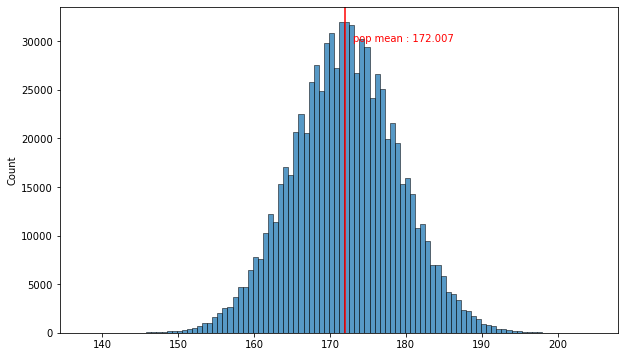

In [11]:
# 우리는 모집단을 알 수 없지만.
# 전지적 분석가 시점에서 살짝 살펴봅시다. (보고 나서 못 본 것으로 합시다.ㅎㅎ)

plt.figure(figsize=(10,6))
sns.histplot(pop, bins = 100)
plt.axvline(np.mean(pop), color = 'r')
plt.text(np.mean(pop)+1, 30000, f'pop mean : {np.mean(pop).round(3)}', color = 'r')
plt.show()

* 표본 조사를 합니다.
    * 50명을 임의로 샘플링 해서
    * 표본의 평균과, 표준 오차, 신뢰구간을 계산해 봅시다.

In [12]:
# 표본조사를 합니다. 50
s1 = rd.sample(pop, 50)
s1 = pd.Series(s1)
round(s1.mean(),3)

173.76

In [13]:
x_mean = []
for i in range(100):
    s1 = rd.sample(pop, 50)
    s1 = pd.Series(s1)
    x_mean.append(round(s1.mean(),3))

x_mean

[171.178,
 173.29,
 171.29,
 171.858,
 170.322,
 172.832,
 171.89,
 171.128,
 173.338,
 171.844,
 173.454,
 173.292,
 171.084,
 173.672,
 171.788,
 171.894,
 171.416,
 172.002,
 172.654,
 172.422,
 170.46,
 172.99,
 172.882,
 172.058,
 171.886,
 171.028,
 171.078,
 171.378,
 172.696,
 170.96,
 170.266,
 171.374,
 173.978,
 173.1,
 172.51,
 169.674,
 170.422,
 172.144,
 169.388,
 171.45,
 172.72,
 171.898,
 172.574,
 173.188,
 173.196,
 171.466,
 173.41,
 170.978,
 171.758,
 173.426,
 169.946,
 171.356,
 170.548,
 172.604,
 172.754,
 170.986,
 171.356,
 170.16,
 171.974,
 171.646,
 171.754,
 170.472,
 172.312,
 171.266,
 173.658,
 170.978,
 173.91,
 171.846,
 172.494,
 173.274,
 172.754,
 171.93,
 171.286,
 172.494,
 172.284,
 172.588,
 172.2,
 170.288,
 172.196,
 171.816,
 172.304,
 171.772,
 171.674,
 172.022,
 171.436,
 172.794,
 171.69,
 172.962,
 173.726,
 172.674,
 171.292,
 171.54,
 172.818,
 171.318,
 173.826,
 171.704,
 173.602,
 171.41,
 172.894,
 172.894]

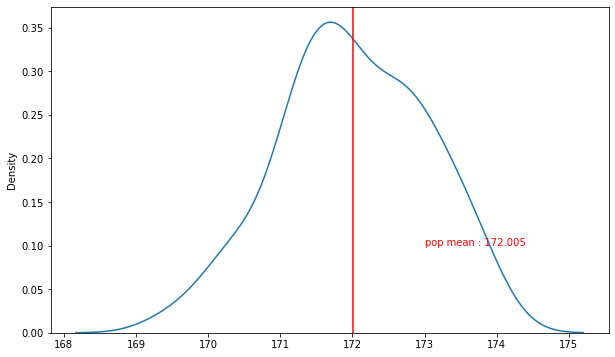

In [14]:
plt.figure(figsize=(10,6))
sns.kdeplot(x_mean)
plt.axvline(np.mean(x_mean), color = 'r')
plt.text(np.mean(x_mean)+1, 0.1, f'pop mean : {round(np.mean(x_mean),3)}', color = 'r')
plt.show() # 평균들의 평균

In [15]:
# 95% 신뢰구간
s1.mean() - (1.96 * s1.sem()), s1.mean() + (1.96 * s1.sem())

(171.05809305856752, 174.7299069414325)

* 표본평균의 신뢰구간과 모평균을 비교해 봅시다.

In [16]:
# 모평균은?
np.mean(pop)

172.00701675000002

* 95% 신뢰구간에 대한 실험을 해 봅시다.
    * 샘플조사를 100번 수행합니다.
    * 그때마다 신뢰구간을 계산한 후
    * 그 중 몇번이 모평균을 포함하는지 확인해 봅시다.
    * 95% 신뢰구간이라면, 100번 중 95번은 모평균을 포함해야 합니다.

In [17]:
# 100번 샘플링
samples = { 'id' : [], 'value' : []}
for i in range(100) :
    samples['id'] += [i]* 100
    samples['value'] += rd.sample(pop,100)

samples = pd.DataFrame(samples)
samples.shape

(10000, 2)

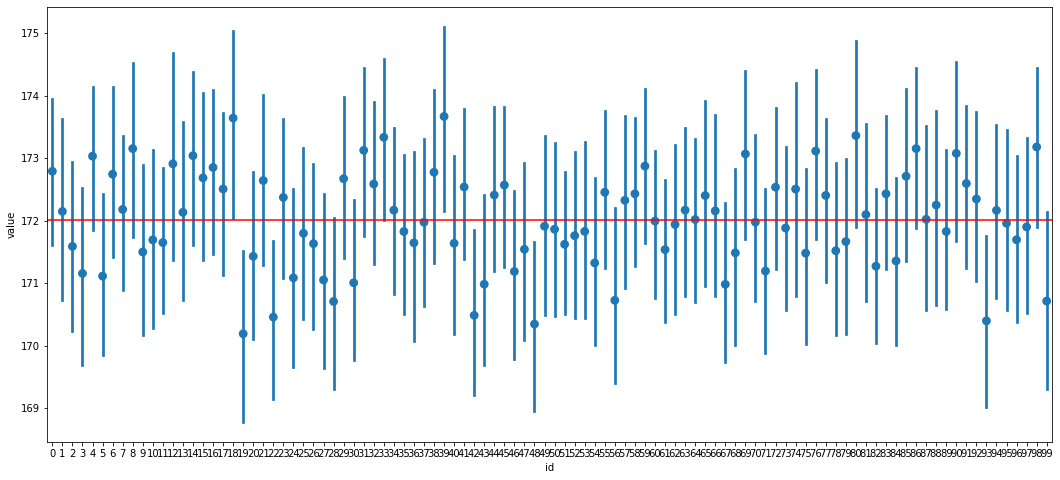

In [18]:
# errorbar 라는 차트 입니다.
# 신뢰구간, 표준오차 구간을 시각화 하는 방법입니다.

plt.figure(figsize = (18, 8))
sns.pointplot(x = 'id', y = 'value', data = samples, join = False)
plt.axhline(np.mean(pop), color = 'r')
plt.show()

위 그래프에 대한 해석
* x축은 100번 시도에 대한 순번(인덱스)
* y축은 모평균(빨간 선)을 추정하기 위한 샘플의 평균과, 신뢰구간 표시

## 4.중심극한 정리

* 표본이 클수록 표집분포는 정규분포에 가까워 진다.


### (1) 정규분포 실험

* 임의의 모집단을 하나 만듭니다.

In [3]:
pop = [round(rd.expovariate(.3)+165,2) for i in range(10001)]

* ① 모집단으로 부터 데이터 n개 짜리 표본을 뽑아 표본평균을 계산합니다.
* ② ①번 작업을 m번 반복하여 얻은 표본평균 m개로 분포를 그려봅니다.

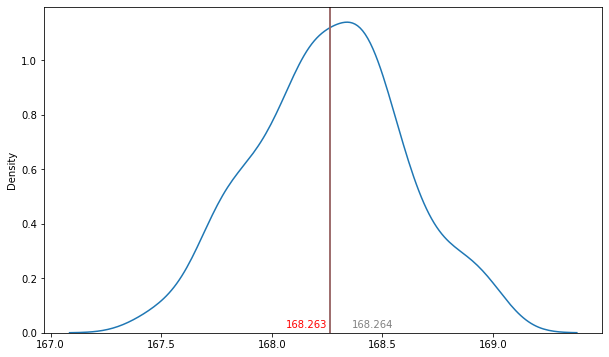

In [6]:
# 표본평균 분포 / 모평균과 비슷

# 표본집합의 크기 = 데이터건수
n = 100

# 표본집합의 개수 = 집합건수
m = 200

sample_mean = [np.mean(rd.sample(pop,n)) for i in range(m)] 

plt.figure(figsize=(10,6))
sns.kdeplot(sample_mean)

plt.axvline(x=np.mean(sample_mean), color = 'red') #표본평균들의 평균
plt.axvline(x=np.mean(pop), color = 'grey') # 모평균

plt.text(np.mean(sample_mean)-.2, 0.02, round(np.mean(sample_mean),3), color = 'red') #표본평균들의 평균
plt.text(np.mean(pop)+.1,0.02, round(np.mean(pop),3), color = 'grey') #모평균

plt.show() # show

* 그렇다면, 모집단은 어떤 분포일까?


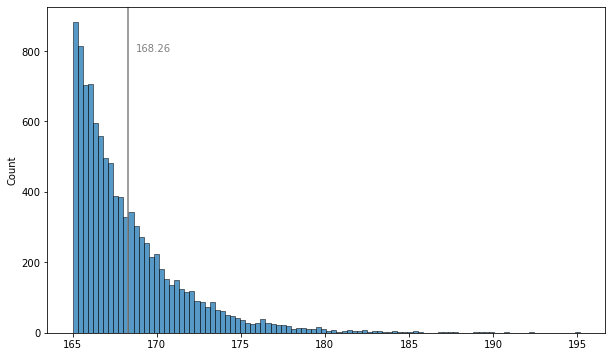

In [7]:
plt.figure(figsize=(10,6)) #설정
sns.histplot(pop, bins = 100)
plt.axvline(x=np.mean(pop), color = 'grey') # 모평균
plt.text(np.mean(pop)+.5, 800, round(np.mean(pop),2), color = 'grey')
plt.show()

### (2) 표본의 크기에 따른 정규분포

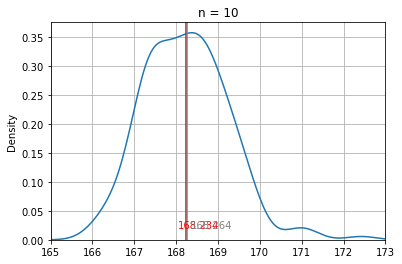

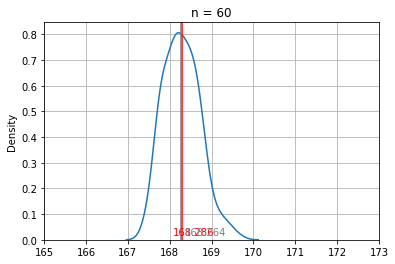

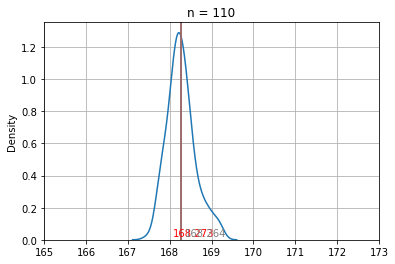

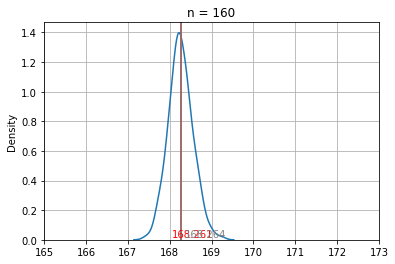

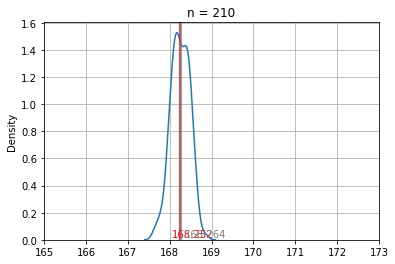

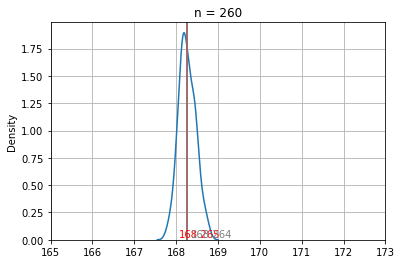

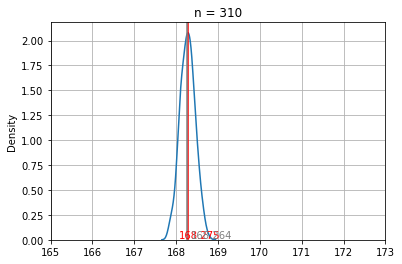

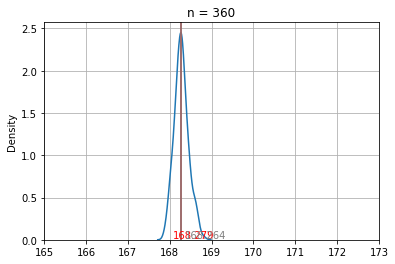

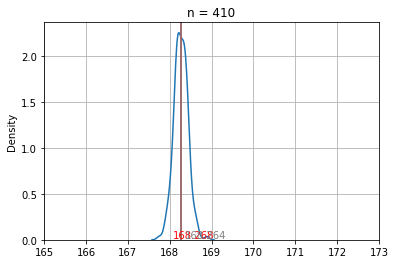

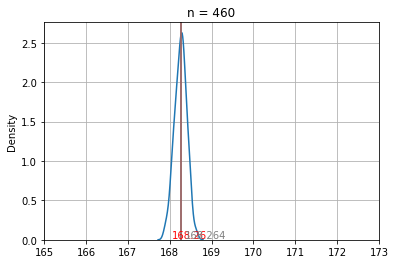

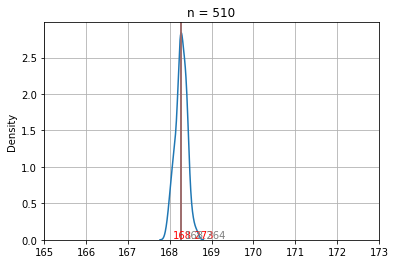

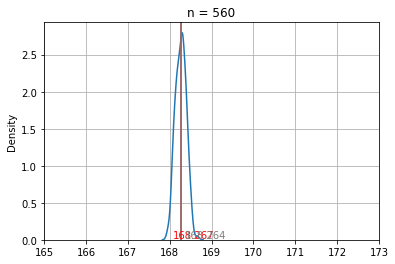

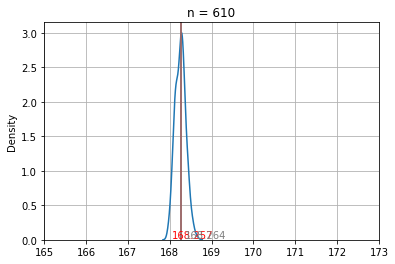

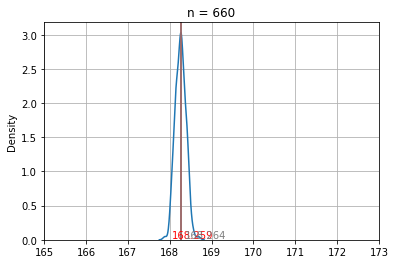

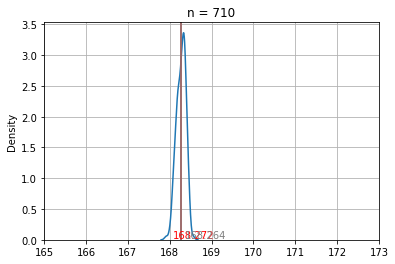

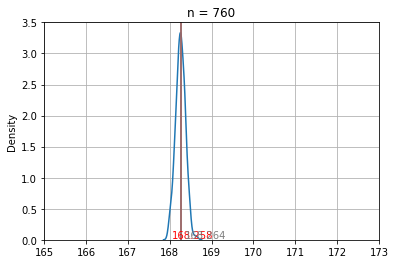

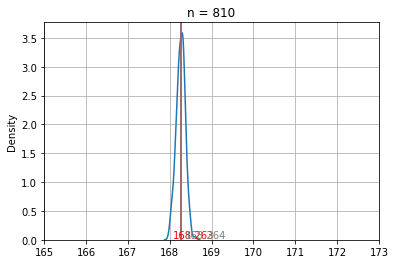

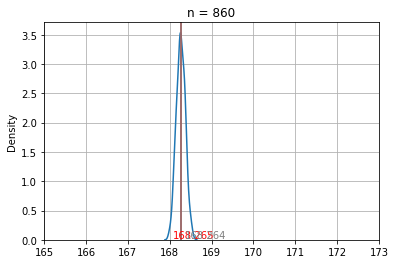

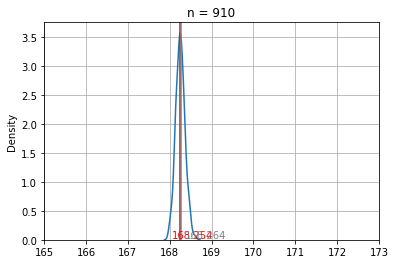

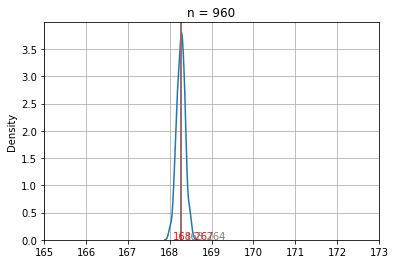

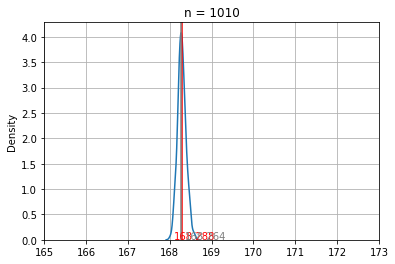

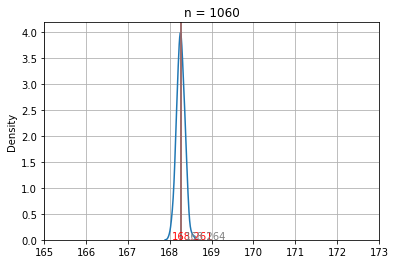

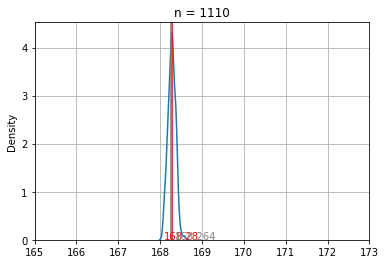

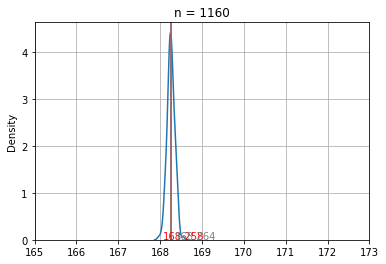

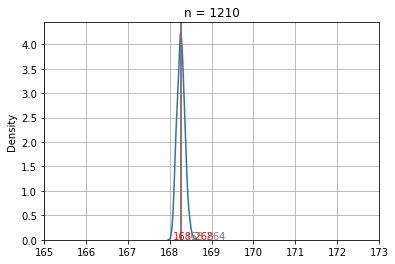

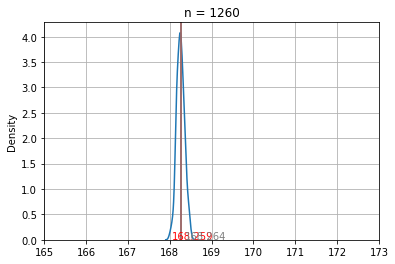

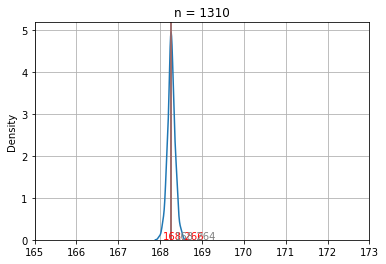

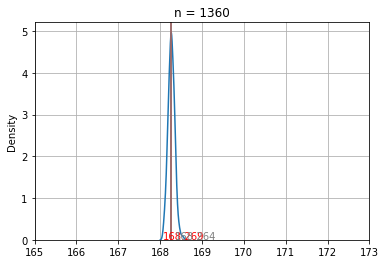

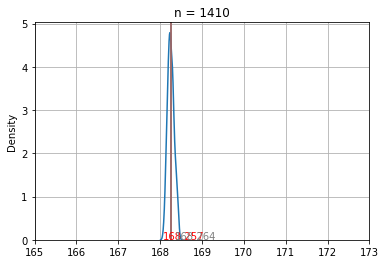

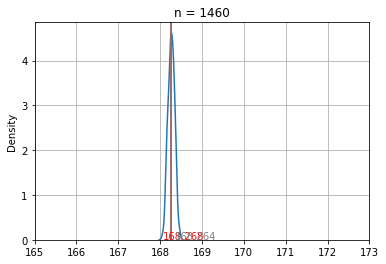

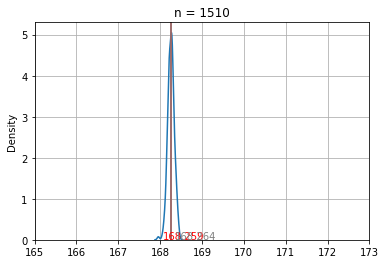

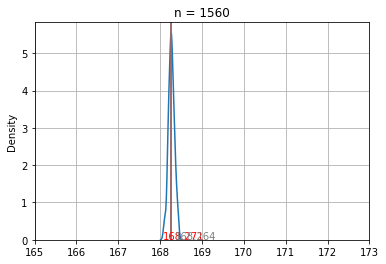

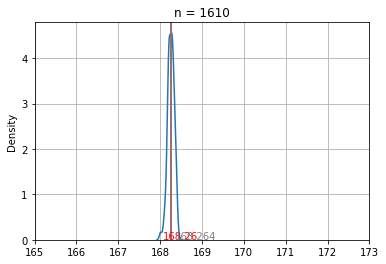

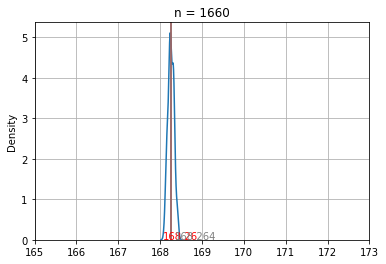

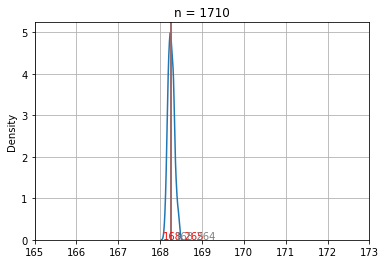

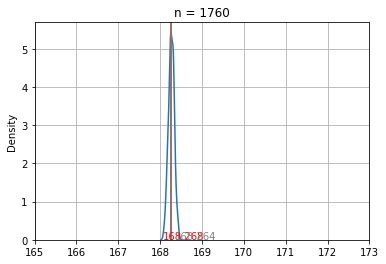

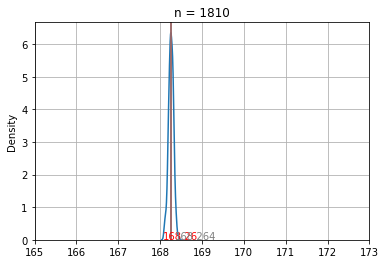

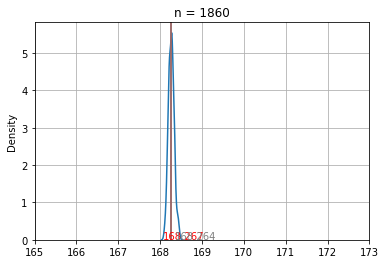

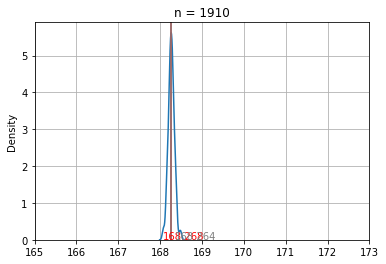

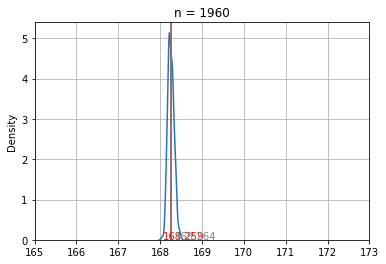

In [8]:
# 표본의 크기
n = 100

# 표본의 갯수
m = 200

for n in range(10,2001, 50 ) :
    sample_mean = [np.mean(rd.sample(pop,n)) for i in range(m)]

    plt.title(f'n = {n}')
    sns.kdeplot(sample_mean)
    plt.axvline(x=np.mean(sample_mean), color = 'red') #표본평균들의 평균
    plt.axvline(x=np.mean(pop), color = 'grey') # 모평균

    plt.text(np.mean(sample_mean)-.2, 0.02, round(np.mean(sample_mean),3), color = 'red') #표본평균들의 평균
    plt.text(np.mean(pop)+.1,0.02, round(np.mean(pop),3), color = 'grey') #모평균
    plt.xlim(165, 173)
    plt.grid()
    plt.show() # show

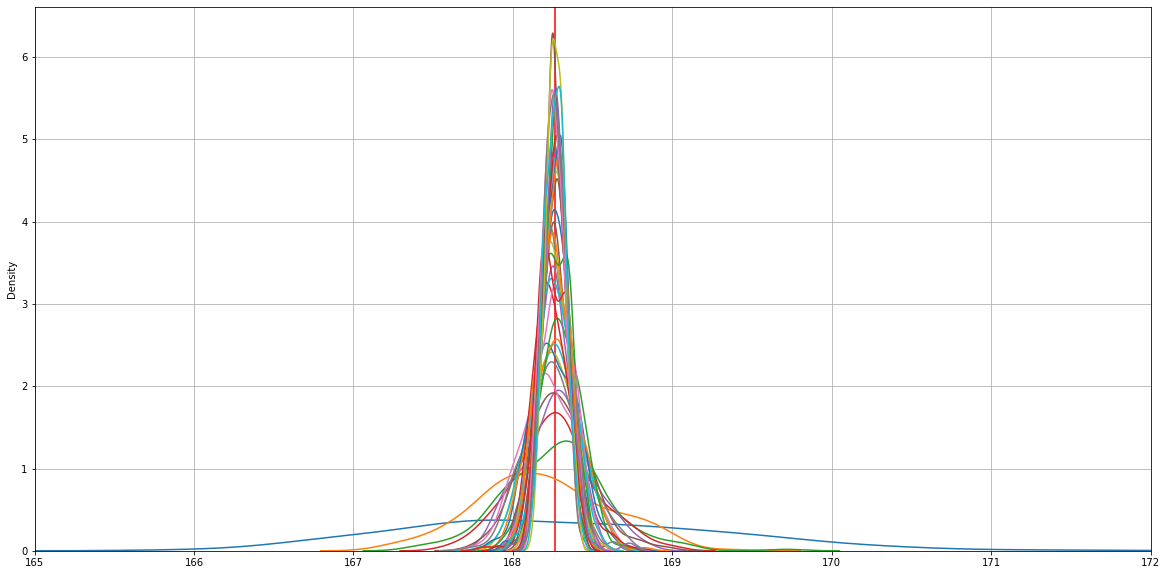

In [9]:
# 표본의 크기
n = 100

# 표본의 갯수
m = 200

plt.figure(figsize = (20,10))
plt.axvline(x=np.mean(pop), color = 'red') # 모평균
plt.xlim(165, 172)
plt.grid()

for n in range(10,2001, 50 ) :
    sample_mean = [np.mean(rd.sample(pop,n)) for i in range(m)]
    sns.kdeplot(sample_mean)

plt.show()